In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
X_train = pd.read_csv('data_trees.csv', index_col=None)

In [3]:
X_train.head()

,ID,SITE,SPECIES,FIRSTCEN,DEATHYEAR,HT83,HT84,HT85,HT86,HT87,HT88,HT89,HT90,HT91,HT92,HT93,HT94,HT95,HT96,HT97,HT98,HT99,HT00,HGRO8384,HGRO8485,HGRO8586,HGRO8687,HGRO8788,HGRO8889,HGRO8990,HGRO9091,HGRO9192,HGRO9293,HGRO9394,HGRO9495,HGRO9596,HGRO9697,HGRO9798,HGRO9899,HGRO9900,DIA83,DIA84,DIA85,DIA86,DIA87,DIA88,DIA89,DIA90,DIA91,DIA92,DIA93,DIA94,DIA95,DIA96,DIA97,DIA98,DIA99,DIA00,DGRO8384,DGRO8485,DGRO8586,DGRO8687,DGRO8788,DGRO8889,DGRO8990,DGRO9091,DGRO9192,DGRO9293,DGRO9394,DGRO9495,DGRO9596,DGRO9697,DGRO9798,DGRO9899,DGRO9900,HOW83,HOW84,HOW85,HOW86,HOW87,HOW88,HOW89,HOW90,HOW91,HOW92,HOW93,HOW94,HOW95,HOW96,HOW97,HOW98,HOW99,HOW00,HTMED83,HTMED84,HTMED85,HTMED86,HTMED87,HTMED88,HTMED89,HTMED90,HTMED91,HTMED92,HTMED93,HTMED94,HTMED95,HTMED96,HTMED97,HTMED98,HTMED99,HTMED00,DATE83,DATE84,DATE85,DATE86,DATE87,DATE88,DATE89,DATE90,DATE91,DATE92,DATE93,DATE94,DATE95,DATE96,DATE97,DATE98,DATE99,DATE00,STMCON84,STMCON85,STMCON86,STMCON87,STMCON88,STMCON89,STMCON90,STMCON91,STMCON92,STMCON93,STMCON94,STMCON95,STMCON96,STMCON97,STMCON98,STMCON99,STMCON00,CRNPO83,CRNPO84,CRNPO85,CRNPO86,CRNPO87,CRNPO88,CRNPO89,CRNPO90,CRNPO91,CRNPO92,CRNPO93,CRNPO94,CRNPO95,CRNPO96,CRNPO97,CRNPO98,CRNPO99,CRNPO00,CRNABV1,HAB83,HAB84,HAB85,HAB86,HAB87,HAB88,HAB89,HAB90,HAB91,HAB92,HAB93,HAB94,HAB95,HAB96,HAB97,HAB98,HAB99,HAB00
0,60275.0,AREAI,LA,1983.0,1984.0,61.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,7.8,9003.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,CAL,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,31.5,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,3/3/1983,3/8/1984,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2.5,-999.00,-999.00,-999.0,-999.00,-999.00,-999.00,-999.0,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.00,-999.0,4.0,3.0,7.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6101.0,AREAI,LA,1983.0,1984.0,52.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,2.4,9003.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,CAL,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,40,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,3/3/1983,3/8/1984,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,7/7/1977,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,2.0,-999.00,-999.00,-999.0,-999.00,-999.00,-999.00,-999.0,-999.00,-999.0,-999.00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.00,-999.0,4.0,2.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,60313.0,AREAI,LA,1983.0,1984.0,42.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-9

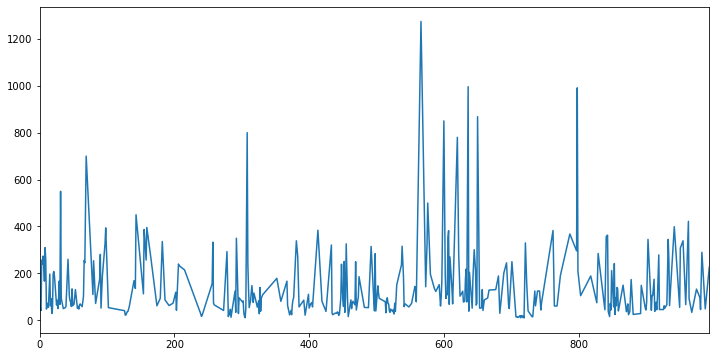

In [6]:
X_train[X_train['HT83']>0]['HT83'].plot(figsize=(12,6))

Kurtosis of normal distribution: 14.776283270486758
Skewness of normal distribution: 3.2361643168352034


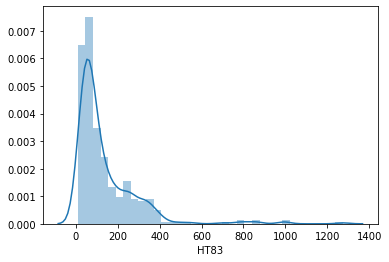

In [7]:
sns.distplot(X_train[X_train['HT83']>0]['HT83']);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(X_train[X_train['HT83']>0]['HT83'])))
print( 'Skewness of normal distribution: {}'.format(stats.skew(X_train[X_train['HT83']>0]['HT83'])))

,count,mean,std,min,25%,50%,75%,max
FIRSTCEN,3381.0,1988.354037,5.542819,1983.0,1983.0,1987.0,1992.0,2000.0
HT83,3381.0,-872.498373,361.402846,-999.0,-999.0,-999.0,-999.0,1274.0


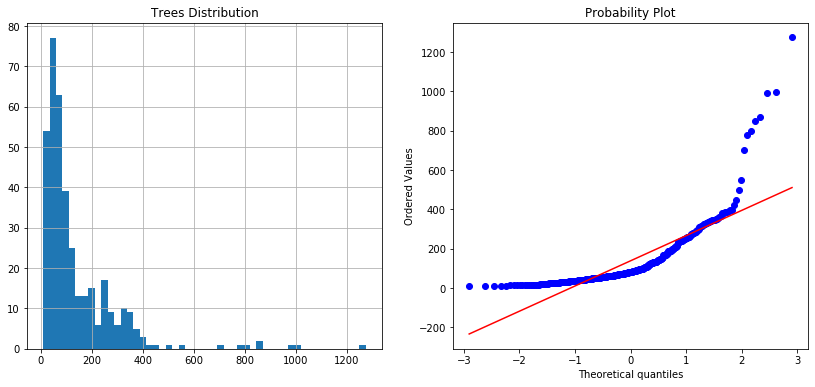

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
X_train[X_train['HT83']>0]['HT83'].hist(bins=50)
plt.title('Trees Distribution')
plt.subplot(1,2,2)
stats.probplot(X_train[X_train['HT83']>0]['HT83'].astype(float), plot=plt);
df1=X_train.loc[:,['FIRSTCEN','HT83']]
df1.describe().T

In [11]:
otg1diff = X_train[X_train['HT83']>0]['HT83'].astype(float).diff(periods=5).dropna()

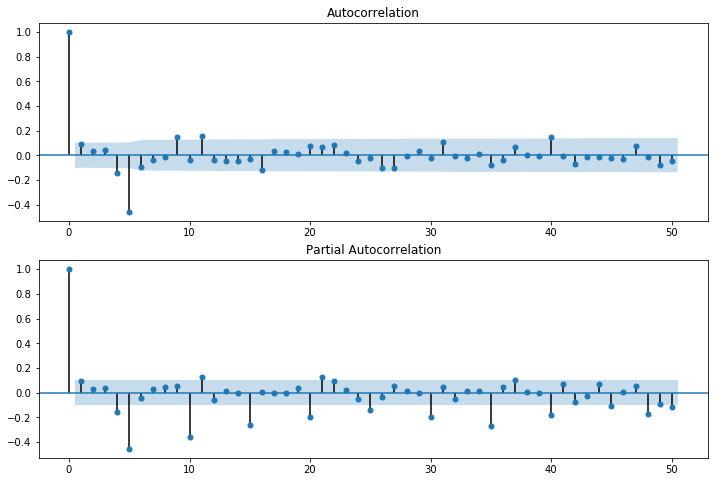

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=50, ax=ax2)